https://www.kaggle.com/sachinsharma1123/cancer-prediction-acc-100/notebook

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df=pd.read_csv('./input/lung_cancer_examples.csv')

In [3]:
df

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1
5,Cristiano,Ronaldo,34,0,10,0,0
6,Mihail,Tal,58,15,10,0,0
7,Kathy,Bates,22,12,5,2,0
8,Nicole,Kidman,45,2,6,0,0
9,Ray,Milland,52,18,4,5,1


In [4]:
df.isnull().sum()

Name       0
Surname    0
Age        0
Smokes     0
AreaQ      0
Alkhol     0
Result     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     59 non-null     object
 1   Surname  59 non-null     object
 2   Age      59 non-null     int64 
 3   Smokes   59 non-null     int64 
 4   AreaQ    59 non-null     int64 
 5   Alkhol   59 non-null     int64 
 6   Result   59 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 3.4+ KB


C:\Users\mirza\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Result', ylabel='count'>

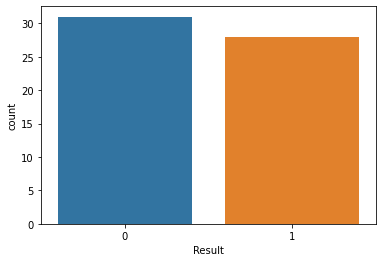

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(df['Result'])

<AxesSubplot:xlabel='Age', ylabel='AreaQ'>

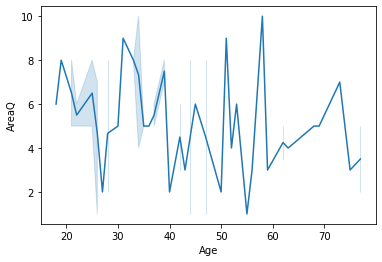

In [7]:
#both the classes are somehow equally balanced

sns.lineplot(x=df['Age'],y=df['AreaQ'],data=df)

<AxesSubplot:xlabel='Age', ylabel='Alkhol'>

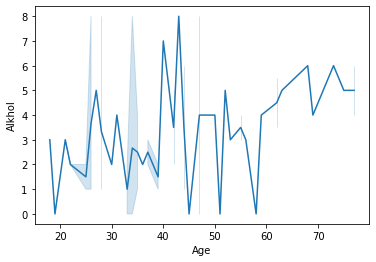

In [8]:
sns.lineplot(x=df['Age'],y=df['Alkhol'],data=df)

<AxesSubplot:xlabel='Age', ylabel='Smokes'>

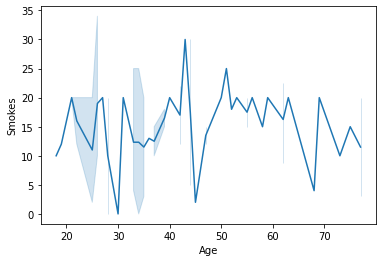

In [9]:
#people belonging to age gropu 40-50 consumes more alcohol

sns.lineplot(x=df['Age'],y=df['Smokes'],data=df)

In [10]:
#drop the unnecessary features like name surname
df=df.drop(['Name','Surname'],axis=1)

In [11]:
y=df['Result']
x=df.drop(['Result'],axis=1)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.1)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
list_scores=[]
list_models=[]
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)
pred_1=lr.predict(x_test)
score_1=accuracy_score(y_test,pred_1)
list_models.append('logisticregression')
list_scores.append(score_1)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
list_1=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    preds=knn.predict(x_test)
    scores=accuracy_score(y_test,preds)
    list_1.append(scores)

<AxesSubplot:>

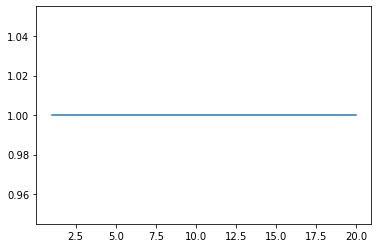

In [15]:
sns.lineplot(x=list(range(1,21)),y=list_1)

In [16]:
list_scores.append(max(list_1))
list_models.append('kneighbors')

In [17]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
pred_2=svm.predict(x_test)
score_2=accuracy_score(y_test,pred_2)
list_scores.append(score_2)
list_models.append('svm')

In [18]:
score_2

1.0

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_3=rfc.predict(x_test)
score_3=accuracy_score(y_test,pred_3)
list_scores.append(score_3)
list_models.append('randomforest classifier')

In [21]:
score_3

1.0

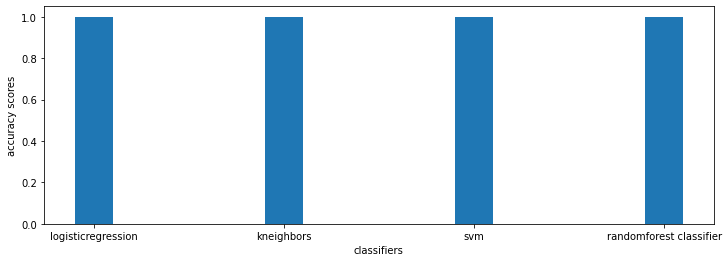

In [22]:
plt.figure(figsize=(12,4))
plt.bar(list_models,list_scores,width=0.2)
plt.xlabel('classifiers')
plt.ylabel('accuracy scores')
plt.show()